# **Análisis de Datos con Python**

En este notebook exploraremos técnicas estadísticas y de visualización para analizar conjuntos de datos. Utilizaremos herramientas como `numpy`, `matplotlib`, `seaborn` y `scipy` para realizar cálculos matemáticos, detectar valores atípicos y representar gráficamente la información.

A continuación, importamos las bibliotecas necesarias para el análisis.  

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Análisis y Visualización de Datos

Este análisis trabaja con un conjunto de datos que contiene las siguientes columnas:

### Columnas del CSV:
1. **price**: Precio de la propiedad en euros (€).
2. **bathrooms**: Número de baños.
3. **bedrooms**: Número de habitaciones.
4. **m2**: Tamaño en metros cuadrados.
5. **address**: Dirección de la propiedad (se debe eliminar la parte `", Madrid"` usando `numpy`).

## 1º Bloque de Evaluación: 25% de la Puntuación

Este bloque representa el 25% de la calificación total y comprende las siguientes tareas:

### 1. **Carga de Datos**
   - Cargar el conjunto de datos utilizando la función `np.genfromtxt()`.
   - Asegurarse de especificar `encoding="utf-8"` para manejar correctamente los caracteres especiales.

In [8]:
precio = np.genfromtxt("../Data/idealista_madrid.csv", usecols=(0), delimiter=",", skip_header=1, dtype=np.float32, encoding="utf-8")
baños = np.genfromtxt("../Data/idealista_madrid.csv", usecols=(1), delimiter=",", skip_header=1, dtype=np.float32, encoding="utf-8")
habitaciones = np.genfromtxt("../Data/idealista_madrid.csv", usecols=(2), delimiter=",", skip_header=1, dtype=np.float32, encoding="utf-8")
metros_cuadrados = np.genfromtxt("../Data/idealista_madrid.csv", usecols=(3), delimiter=",", skip_header=1, dtype=np.float32, encoding="utf-8")
direccion = np.genfromtxt("../Data/idealista_madrid.csv", usecols=(4), delimiter=",", skip_header=1, dtype=str, encoding="utf-8") 

# Quitar ", Madrid" de las direcciones (esta era la forma de quitarlo)
# direccion = np.array([d.replace(", Madrid", "") for d in direccion])


In [9]:
print(precio[:5])
print(baños[:5])
print(habitaciones[:5])
print(metros_cuadrados[:5])
print(direccion[:5])

[1920000. 1995000. 1300000. 1650000. 1590750.]
[3. 3. 3. 3. 3.]
[3. 3. 4. 3. 3.]
[183. 170. 270. 248. 116.]
['Recoletos' 'Castellana' 'Hortaleza' 'Chamartín' 'Recoletos']



### 2. **Cálculo de Estadísticas Básicas**
   - **Media**: Calcular el promedio para cada columna numérica.
   - **Mediana**: Calcular el valor central de los datos para cada columna numérica.
   - **Máximo y Mínimo**: Identificar los valores más altos y más bajos para cada columna numérica.

#### 2.1 MEDIA

In [10]:
media_precio = np.mean(precio)
media_baños = np.mean(baños)
media_habitaciones = np.mean(habitaciones)
media_metros_cuadrados = np.mean(metros_cuadrados)


print(f"Media del precio: {media_precio}")
print(f"Media de habitaciones: {media_habitaciones}")
print(f"Media de baños: {media_baños}")
print(f"Media de metros cuadrados: {media_metros_cuadrados}")

Media del precio: 1290575.125
Media de habitaciones: 3.4743168354034424
Media de baños: 2.9005465507507324
Media de metros cuadrados: 217.23825073242188


#### 2.2 MEDIANA

In [11]:
mediana_precio = np.median(precio)
mediana_baños = np.median(baños)
mediana_habitaciones = np.median(habitaciones)
mediana_metros_cuadrados = np.median(metros_cuadrados)


print(f"Mediana del precio: {mediana_precio}")
print(f"Mediana de habitaciones: {mediana_habitaciones}")
print(f"Mediana de baños: {mediana_baños}")
print(f"Mediana de metros cuadrados: {mediana_metros_cuadrados}")

Mediana del precio: 990000.0
Mediana de habitaciones: 3.0
Mediana de baños: 3.0
Mediana de metros cuadrados: 158.0


#### 2.3-A  MÁXIMO

In [12]:
maximo_precio = np.max(precio)
maximo_baños = np.max(baños)
maximo_habitaciones = np.max(habitaciones)
maximo_metros_cuadrados = np.max(metros_cuadrados)


print(f"Máximo del precio: {maximo_precio}")
print(f"Máximo de habitaciones: {maximo_habitaciones}")
print(f"Máximo de baños: {maximo_baños}")
print(f"Máximo de metros cuadrados: {maximo_metros_cuadrados}")

Máximo del precio: 8900000.0
Máximo de habitaciones: 12.0
Máximo de baños: 12.0
Máximo de metros cuadrados: 1768.0


#### 2.3-B MÍNIMO

In [13]:
minimo_precio = np.min(precio)
minimo_baños = np.min(baños)
minimo_habitaciones = np.min(habitaciones)
minimo_metros_cuadrados = np.min(metros_cuadrados)


print(f"Mínimo del precio: {minimo_precio}")
print(f"Mínimo de habitaciones: {minimo_habitaciones}")
print(f"Mínimo de baños: {minimo_baños}")
print(f"Mínimo de metros cuadrados: {minimo_metros_cuadrados}")

Mínimo del precio: 122000.0
Mínimo de habitaciones: 0.0
Mínimo de baños: 1.0
Mínimo de metros cuadrados: 14.0


### 3. **Visualizaciones**
   - **Histograma**: Representar la distribución de los datos para cada columna numérica.
   - **Curva de Densidad**: Superponer una curva de densidad sobre el histograma para una mejor visualización de la distribución de los datos.


In [14]:

# Función para histograma y curva de densidad
def plot_histograma_y_densidad(data, title="Distribución de Datos", xlabel="Valores"):
    plt.figure(figsize=(10, 6))
    media = np.mean(data)
    
    # Histograma
    plt.hist(data, bins=20, color='lightblue', alpha=0.7, edgecolor='black', density=True, label="Histograma")
    plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'media: {media:.1f}')

    # Curva de densidad 
    sns.kdeplot(data, color='darkblue', label='Curva de Densidad')

    # Configuración del gráfico
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel("Densidad", fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


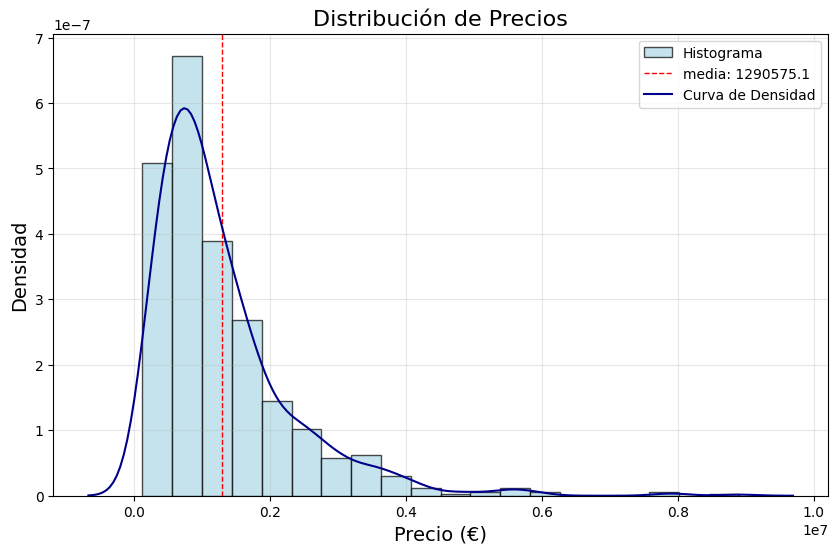

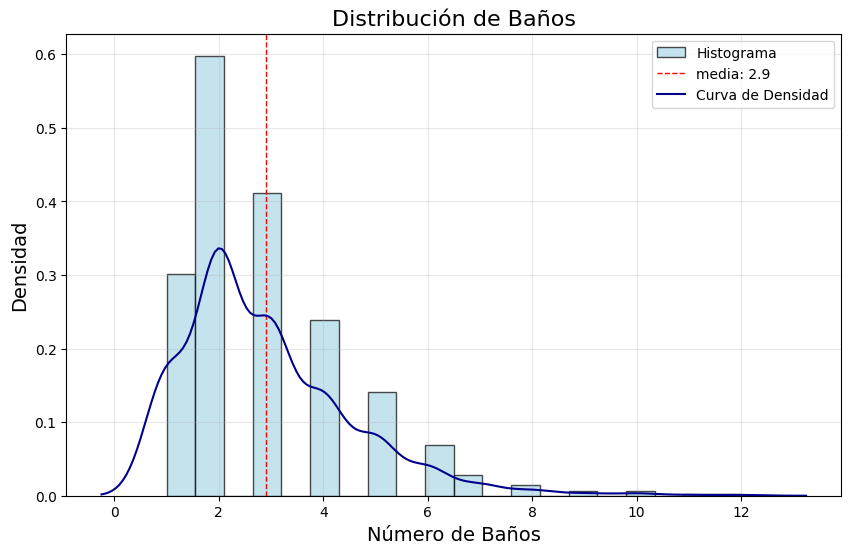

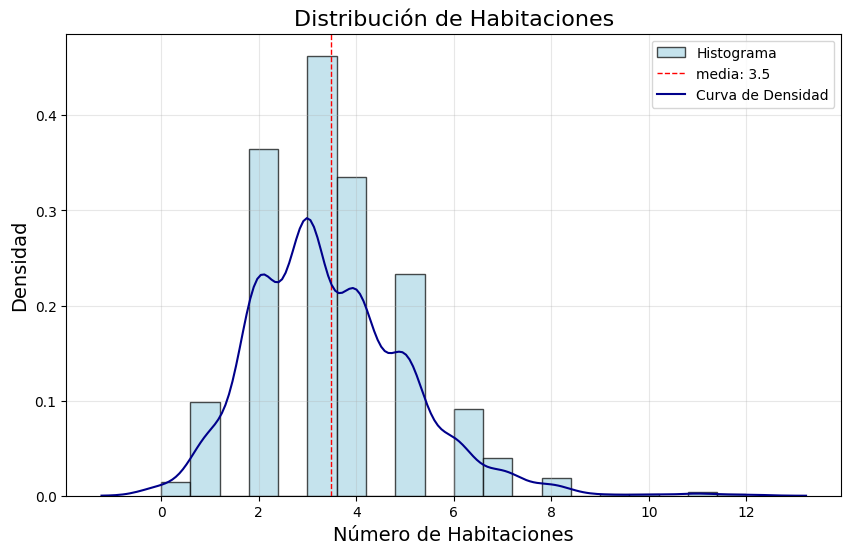

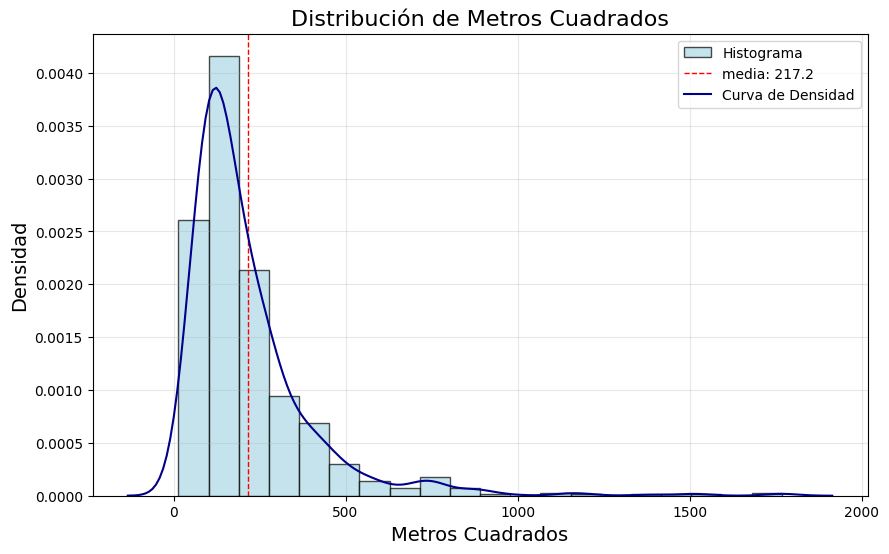

In [15]:
# Visualizaciones
plot_histograma_y_densidad(precio, "Distribución de Precios", "Precio (€)")
plot_histograma_y_densidad(baños, "Distribución de Baños", "Número de Baños")
plot_histograma_y_densidad(habitaciones, "Distribución de Habitaciones", "Número de Habitaciones")
plot_histograma_y_densidad(metros_cuadrados, "Distribución de Metros Cuadrados", "Metros Cuadrados")

## 2º Bloque de Evaluación: 25% de la Puntuación

Este bloque representa el 25% de la calificación total y comprende las siguientes tareas:

---

### Puntos Clave:
- Este bloque debe realizarse para las **cuatro columnas numéricas**: `price`, `bedrooms`, `bathrooms`, `m2`.
- Asegurarse de realizar los cálculos correctamente y filtrar los datos según las indicaciones.

---

### 1. **Cuartiles**
   - Calcular los cuartiles: **Q1 (25%)**, **Q2 (50%)**, **Q3 (75%)** para cada columna numérica.


In [16]:
def calcular_cuatriles(data, label):
    Q1 = np.percentile(data, 25)
    Q2 = np.mean(data)
    Q3 = np.percentile(data, 75) 
    print(f"Para {label}:")
    print(f"  Q1 (25%): {Q1}")
    print(f"  Q2 (50% - Mediana): {Q2}")
    print(f"  Q3 (75%): {Q3}")
    print("-" * 40)

calcular_cuatriles(precio, "Precio")
calcular_cuatriles(baños, "Baños")
calcular_cuatriles(habitaciones, "Habitaciones")
calcular_cuatriles(metros_cuadrados, "Metros Cuadrados")

Para Precio:
  Q1 (25%): 625000.0
  Q2 (50% - Mediana): 1290575.125
  Q3 (75%): 1650000.0
----------------------------------------
Para Baños:
  Q1 (25%): 2.0
  Q2 (50% - Mediana): 2.9005465507507324
  Q3 (75%): 4.0
----------------------------------------
Para Habitaciones:
  Q1 (25%): 2.0
  Q2 (50% - Mediana): 3.4743168354034424
  Q3 (75%): 4.0
----------------------------------------
Para Metros Cuadrados:
  Q1 (25%): 104.0
  Q2 (50% - Mediana): 217.23825073242188
  Q3 (75%): 264.0
----------------------------------------


### 2. **Rango Intercuartílico (IQR)**
   - Calcular el **IQR** (diferencia entre Q3 y Q1) para medir la dispersión.

In [17]:
# Calcular cuartiles y IQR para cada columna
def calcular_IQR(data, label):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75) 
    IQR = Q3 - Q1
    print(f"Para {label}:")
    print(f"  IQR (Rango Intercuartil): {IQR}")
    print("-" * 40)


calcular_IQR(precio, "Precio")
calcular_IQR(baños, "Baños")
calcular_IQR(habitaciones, "Habitaciones")
calcular_IQR(metros_cuadrados, "Metros Cuadrados")

Para Precio:
  IQR (Rango Intercuartil): 1025000.0
----------------------------------------
Para Baños:
  IQR (Rango Intercuartil): 2.0
----------------------------------------
Para Habitaciones:
  IQR (Rango Intercuartil): 2.0
----------------------------------------
Para Metros Cuadrados:
  IQR (Rango Intercuartil): 160.0
----------------------------------------


### 3. **Filtrado de Datos**
   - Filtrar el **20% más caro** y el **20% más barato** de los precios.
   - Opcional: Filtrar los barrios que corresponden al **20% más barato**.

In [18]:
# Función para filtrar 20% más barato y 20% más caro de los precios
def filtrar_precios(precio):
    # Calculamos el percentil 20 y 80 para el precio
    percentil_20 = np.percentile(precio, 20)
    percentil_80 = np.percentile(precio, 80)

    # Filtramos los precios según el percentil 20 y 80
    precios_baratos = precio[precio <= percentil_20]
    precios_caros = precio[precio >= percentil_80]

    return precios_baratos, precios_caros

precios_baratos, precios_caros = filtrar_precios(precio)

print(f"Precios más baratos (20%): {precios_baratos}")
print(f"Precios más caros (20%): {precios_caros}")

Precios más baratos (20%): [470000. 475000. 380000. 325000. 320000. 238000. 425000. 233000. 330000.
 529900. 359000. 515000. 378000. 164000. 410000. 330000. 517000. 490000.
 435000. 399000. 430000. 450000. 460000. 338000. 132000. 439000. 250000.
 442327. 485000. 345000. 400000. 315000. 500000. 375000. 369000. 385000.
 525000. 229000. 260000. 499000. 410000. 199000. 525000. 529900. 267000.
 260000. 475000. 319000. 510000. 475000. 250000. 420000. 317000. 350000.
 475000. 385000. 515000. 450000. 365900. 249900. 269900. 385000. 214900.
 349000. 345000. 290000. 480000. 335000. 260000. 145000. 279000. 179000.
 299000. 339000. 404000. 285000. 525000. 388000. 180000. 388000. 265000.
 388000. 309000. 262500. 203000. 460000. 375000. 329900. 450000. 299000.
 390000. 288000. 300000. 150000. 389000. 320000. 425000. 380000. 464000.
 239900. 375000. 299000. 470000. 370000. 125000. 520000. 155000. 498000.
 140000. 369000. 370000. 475000. 299000. 500000. 270000. 137000. 253000.
 334740. 155000. 259000.

In [19]:
# Función para filtrar barrios correspondientes al 20% más barato
def filtrar_barrios_mas_baratos(precio, direccion):
    # Calcular el percentil 20 para el precio
    percentil_20 = np.percentile(precio, 20)

    # Filtrar los barrios que están en el 20% más barato
    barrios_baratos = direccion[precio <= percentil_20]

    return barrios_baratos

barrios_baratos = filtrar_barrios_mas_baratos(precio, direccion)

print(f"Barrios correspondientes al 20% más barato: {barrios_baratos}")

Barrios correspondientes al 20% más barato: ['Fuencarral' 'Comillas' 'Palos de Moguer' 'Bellas Vistas' 'Palacio'
 'Lavapiés-Embajadores' 'Gaztambide' 'Ciudad Lineal' 'Chueca-Justicia'
 'Centro' 'Rejas' 'Centro' 'Pau de Carabanchel' 'Zofío' 'Guindalera'
 'Malasaña-Universidad' 'La Paz' 'Valdezarza' 'Argüelles'
 'Fuente del Berro' 'Prosperidad' 'Pacífico' 'Costillares' 'Trafalgar'
 'Simancas' 'La Paz' 'Guindalera' 'Castilla' 'Castellana' 'Pinar del Rey'
 'Acacias' 'Goya' 'Acacias' 'Pacífico' 'Cuzco-Castillejos' 'Valdezarza'
 'Palos de Moguer' 'San Isidro' 'Opañel' 'Malasaña-Universidad'
 'Guindalera' 'Chueca-Justicia' 'Lavapiés-Embajadores' 'Centro' 'Palacio'
 'Valdeacederas' 'Hortaleza' 'Arapiles' 'Guindalera' 'Cuatro Caminos'
 'Chueca-Justicia' 'Canillas' 'Lavapiés-Embajadores' 'Ciudad Lineal'
 'Valdeacederas' 'Imperial' 'Fuente del Berro' 'Berruguete' 'Concepción'
 'Quintana' 'Simancas' 'Lavapiés-Embajadores' 'Pueblo Nuevo'
 'Valdeacederas' 'Centro' 'Simancas' 'Peñagrande' 'San Isidro


### 4. **Moda**
   - Calcular la **moda** para la columna `address` (dirección).

In [20]:
from collections import Counter

direccion_lista = direccion.tolist()

contador = Counter(direccion_lista)

# Tras meter las direcciones en una lista y realizar el contador, realizamos la moda con most_common()
moda = contador.most_common(5)
print("Moda:")
for barrio, count in moda:
    print(f"{barrio}: {count} propiedades")

Moda:
Barrio de Salamanca: 63 propiedades
Hortaleza: 60 propiedades
Chamartín: 54 propiedades
Moncloa: 48 propiedades
Centro: 47 propiedades


   - Opcional: Calcular la moda para los barrios **más baratos** y **más caros**.

In [21]:

# En primer lugar calculamos los percentiles para los precios
percentil_20_bajo = np.percentile(precio, 20)
percentil_80_alto = np.percentile(precio, 80)

# Luego se Filtran las direcciones correspondientes a los precios más baratos y más caros
barrios_mas_baratos = direccion[precio <= percentil_20_bajo]
barrios_mas_caros = direccion[precio >= percentil_80_alto]

# Convertimos a listas para contar frecuencias
barrios_mas_baratos_lista = barrios_mas_baratos.tolist()
barrios_mas_caros_lista = barrios_mas_caros.tolist()

# Calculamos la moda para los barrios más baratos (Yo he filtrado los 3 más baratos => most_common(3))
contador_baratos = Counter(barrios_mas_baratos_lista)
moda_baratos = contador_baratos.most_common(3)

print("Moda de los barrios más baratos:")
for barrio, count in moda_baratos:
    print(f"{barrio}: {count} propiedades")

# Calculamos la moda para los barrios más caros (Yo he filtrado los 3 más caros => most_common(3))
contador_caros = Counter(barrios_mas_caros_lista)
moda_caros = contador_caros.most_common(3)

print("\nModa de los barrios más caros:")
for barrio, count in moda_caros:
    print(f"{barrio}: {count} propiedades")

Moda de los barrios más baratos:
Lavapiés-Embajadores: 12 propiedades
Valdeacederas: 10 propiedades
Centro: 9 propiedades

Moda de los barrios más caros:
Hortaleza: 21 propiedades
Barrio de Salamanca: 20 propiedades
Chamartín: 19 propiedades


### 5. **Dispersión**
   - Calcular la **varianza** y **desviación estándar** para las columnas numéricas.

In [22]:
def calcular_dispersion(array, label):
    varianza = np.var(array)
    desviacion_estandar = np.std(array)
    
    print(f"La varianza de {label} es: {varianza}")
    print(f"La desviación estándar de {label} es: {desviacion_estandar}")
    print("------------------------------------------------------")
    
    return varianza, desviacion_estandar 
    # El return lo pongo para poder usar el resultado tanto la varianza como la desviación estándar en otros calculos 

# Con la función ya podemos calcular la dispersión para cada columna y guardar los resultados
varianza_precio, desv_estandar_precio = calcular_dispersion(precio, "precio")
varianza_baños, desv_estandar_baños = calcular_dispersion(baños, "baños")
varianza_habitaciones, desv_estandar_habitaciones = calcular_dispersion(habitaciones, "habitaciones")
varianza_metros_cuadrados, desv_estandar_metros_cuadrados = calcular_dispersion(metros_cuadrados, "metros cuadrados")

La varianza de precio es: 1073448157184.0
La desviación estándar de precio es: 1036073.4375
------------------------------------------------------
La varianza de baños es: 2.6425678730010986
La desviación estándar de baños es: 1.6255977153778076
------------------------------------------------------
La varianza de habitaciones es: 2.540050745010376
La desviación estándar de habitaciones es: 1.593753695487976
------------------------------------------------------
La varianza de metros cuadrados es: 36726.27734375
La desviación estándar de metros cuadrados es: 191.64100646972656
------------------------------------------------------


## 3º Bloque de Análisis: 25% de la Puntuación

Este bloque se enfoca en tareas relacionadas con la identificación de valores atípicos, el análisis de correlaciones entre variables y la estandarización de datos. Comprende los siguientes apartados:

---

### Notas:
- Este análisis permite identificar relaciones importantes entre las variables y asegura que los datos estén preparados para futuros análisis estadísticos o modelos predictivos.
- Las gráficas deben ser claras y permitir una interpretación rápida de los resultados.

---

### 1. **Filtro de Outliers**
- Aplicar **métodos de Tukey** (basado en el rango intercuartil, IQR) y **Z-Score** para identificar outliers.
- Representar gráficamente los límites de los outliers:
  - **Límite inferior y superior**: marcados en **rojo** y **azul**, respectivamente.


Límite inferior: -912500.0
Límite superior: 3187500.0
Outliers detectados: [5700000. 3950000. 3900000. 4950000. 7900000. 5500000. 3500000. 3550000.
 3200000. 3500000. 3500000. 4300000. 5500000. 3600000. 3900000. 5000000.
 3700000. 3600000. 3600000. 5900000. 4200000. 3600000. 3500000. 3950000.
 5500000. 4200000. 8900000. 3465000. 3700000. 3700000. 3490000. 3950000.
 3200000. 3200000. 3250000. 5900000. 3200000. 3950000. 3195000. 3950000.
 3200000. 3600000. 4500000. 3500000. 4200000. 5500000. 3500000. 4750000.
 3500000. 3195000. 4000000. 3250000. 3300000. 3950000. 7900000.]


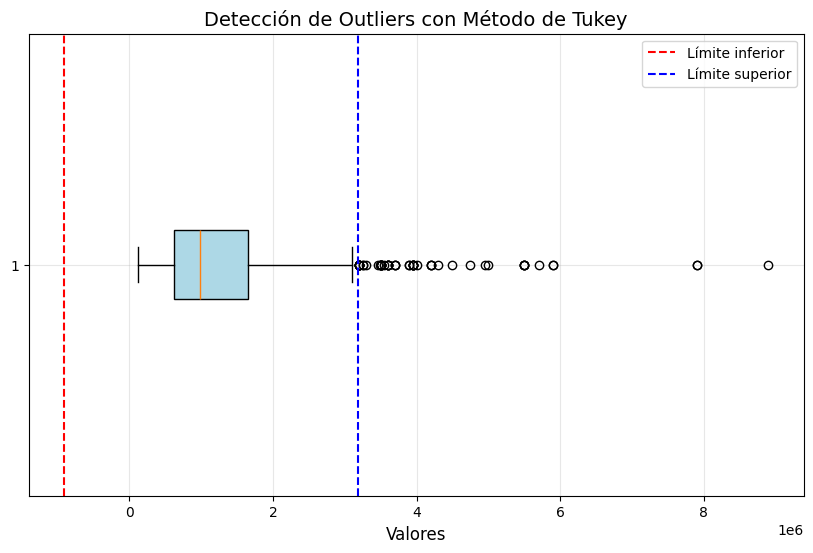

(-912500.0, 3187500.0)

In [23]:
def outliers_tukey(array, z=3):
    # Como ya hicimos en el bloque anterior calcumalos los cuartiles
    q1 = np.percentile(array, 25)
    q3 = np.percentile(array, 75)
    
    # Tras el calculo de los cuartiles, calmulamos el rango intercuartil
    ric = q3 - q1
    
    # Ahora con el valor de z, calculamos el límite superior e inferior
    lim_inf = q1 - z * ric
    lim_sup = q3 + z * ric
    
    print(f"Límite inferior: {lim_inf}")
    print(f"Límite superior: {lim_sup}")
    
    # Indentificamos los outliers
    outliers = array[(array < lim_inf) | (array > lim_sup)]
    print(f"Outliers detectados: {outliers}")
    
    # Gráfico
    plt.figure(figsize=(10, 6))
    plt.boxplot(array, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue", color="black"))
    plt.axvline(lim_inf, color='red', linestyle='--', label='Límite inferior')
    plt.axvline(lim_sup, color='blue', linestyle='--', label='Límite superior')
    plt.title("Detección de Outliers con Método de Tukey", fontsize=14)
    plt.xlabel("Valores", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    
    return lim_inf, lim_sup

outliers_tukey(precio, 1.5)

### 2. **Correlación**
- Calcular la **matriz de correlación** entre las variables numéricas del dataset.

In [24]:
columnas = [precio, baños, habitaciones, metros_cuadrados]

matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
    
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(matriz)

[[1.         0.69162533 0.55718934 0.6817625 ]
 [0.69162533 0.99999996 0.77076475 0.81873294]
 [0.55718935 0.77076476 0.99999996 0.7126548 ]
 [0.6817625  0.81873294 0.7126548  1.        ]]


- Visualizar la matriz de correlación utilizando un **heatmap** de `matplotlib` o `seaborn`.

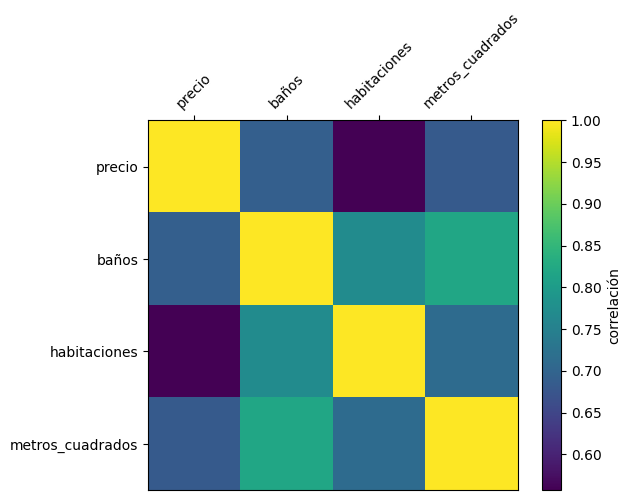

In [25]:
# Matplotlib
column_names = ['precio', 'baños', 'habitaciones', 'metros_cuadrados']
plt.imshow(matriz, cmap='viridis')
plt.colorbar(label='correlación')
plt.xticks(range(len(column_names)), column_names, rotation=45)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position('top')

<Axes: >

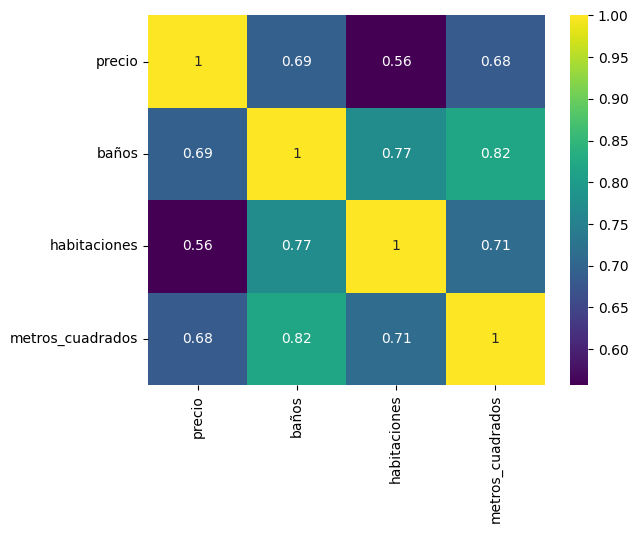

In [26]:
# Seaborn
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names, yticklabels=column_names)

### 3. **Estandarización**
- Estandarizar las variables numéricas para que tengan media = 0 y desviación estándar = 1.
- Este paso es esencial para métodos que dependen de escalas homogéneas, como el análisis de PCA o algoritmos de machine learning.

Estadísticas originales para Precio:
  Media: 1290575.125
  Mediana: 990000.0
  Desviación estándar: 1036073.4375
----------------------------------------
Estadísticas originales para Baños:
  Media: 2.9005465507507324
  Mediana: 3.0
  Desviación estándar: 1.6255977153778076
----------------------------------------
Estadísticas originales para Habitaciones:
  Media: 3.4743168354034424
  Mediana: 3.0
  Desviación estándar: 1.593753695487976
----------------------------------------
Estadísticas originales para Metros Cuadrados:
  Media: 217.23825073242188
  Mediana: 158.0
  Desviación estándar: 191.64100646972656
----------------------------------------
Estadísticas estandarizadas para Precio:
  Media: 0.00 (debe ser ~0)
  Mediana: -0.29
  Desviación estándar: 1.00 (debe ser ~1)
----------------------------------------
Estadísticas estandarizadas para Baños:
  Media: -0.00 (debe ser ~0)
  Mediana: 0.06
  Desviación estándar: 1.00 (debe ser ~1)
----------------------------------------
Est

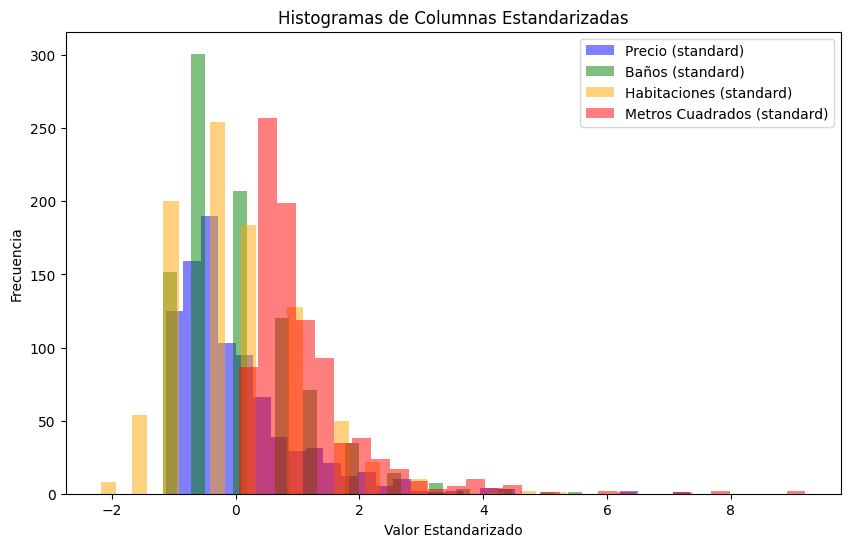

In [27]:
# Calculamos las estadísticas originales
columnas = [precio, baños, habitaciones, metros_cuadrados]
nombres_columnas = ["Precio", "Baños", "Habitaciones", "Metros Cuadrados"]

# He vuelto a hacer la media y la mediana para que en los resultados aparezcan juntos los datos originales y los estandarizados para compararlos
for columna, nombre in zip(columnas, nombres_columnas):
    mean_original = np.mean(columna)
    median_original = np.median(columna)
    std_original = np.std(columna)
    
    print(f"Estadísticas originales para {nombre}:")
    print(f"  Media: {mean_original}")
    print(f"  Mediana: {median_original}")
    print(f"  Desviación estándar: {std_original}")
    print("-" * 40)

# Estandarizamos las columnas
precio_standard = (precio - media_precio) / np.std(precio)
baños_standard = (baños - media_baños) / np.std(baños)
habitaciones_standard = (habitaciones - media_habitaciones) / np.std(habitaciones)
metros_cuadrados_standard = (metros_cuadrados - media_habitaciones) / np.std(metros_cuadrados)

columnas_standard = [precio_standard, baños_standard, habitaciones_standard, metros_cuadrados_standard]

# Sacamos las estadísticas de los datos estandarizados
for columna, nombre in zip(columnas_standard, nombres_columnas):
    mean_standard = np.mean(columna)
    median_standard = np.median(columna)
    std_standard = np.std(columna)
    
    print(f"Estadísticas estandarizadas para {nombre}:")
    print(f"  Media: {mean_standard:.2f} (debe ser ~0)")
    print(f"  Mediana: {median_standard:.2f}")
    print(f"  Desviación estándar: {std_standard:.2f} (debe ser ~1)")
    print("-" * 40)

# Visualizamos los histogramas estandarizados
plt.figure(figsize=(10, 6))
plt.hist(precio_standard, bins=30, color="blue", alpha=0.5, label="Precio (standard)")
plt.hist(baños_standard, bins=30, color="green", alpha=0.5, label="Baños (standard)")
plt.hist(habitaciones_standard, bins=30, color="orange", alpha=0.5, label="Habitaciones (standard)")
plt.hist(metros_cuadrados_standard, bins=30, color="red", alpha=0.5, label="Metros Cuadrados (standard)")
plt.title("Histogramas de Columnas Estandarizadas")
plt.xlabel("Valor Estandarizado")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

## 4º Bloque de Evaluación: 25% de la Puntuación

Este bloque representa el 25% de la calificación total y comprende las siguientes tareas:

### 1. Asimetría y Curtosis
- Calcular la asimetría y la curtosis para las columnas numéricas.
- Interpretar los resultados en términos de sesgo y forma de la distribución.


In [28]:
from scipy.stats import skew, kurtosis

columnas_numericas = {'Precio': precio, 'Baños': baños, 'Habitaciones': habitaciones, 'Metros Cuadrados': metros_cuadrados}

for nombre, data in columnas_numericas.items():
    asimetria = skew(data)
    curtosis = kurtosis(data)

    # Interpretación de la asimetría
    if asimetria > 0:
        interpretacion_asimetria = "Distribución sesgada a la derecha (colas más largas en valores altos)."
    elif asimetria < 0:
        interpretacion_asimetria = "Distribución sesgada a la izquierda (colas más largas en valores bajos)."
    else:
        interpretacion_asimetria = "Distribución simétrica."

    # Interpretación de la curtosis
    if curtosis > 3:
        interpretacion_curtosis = (
            "Leptocúrtica: Curva más apuntada que la normal, con un decaimiento rápido y colas más ligeras."
        )
    elif curtosis == 3:
        interpretacion_curtosis = "Mesocúrtica: Curtosis similar a la normal."
    else:
        interpretacion_curtosis = (
            "Paticúrtica: Curva más plana que la normal, con un decaimiento lento y colas más pesadas."
        )

    print(f"Columna: {nombre}")
    print(f"  Asimetría: {asimetria:.2f} => Interpretación: {interpretacion_asimetria}") 
    print(f"  Curtosis: {curtosis:.2f} => Interpretación: {interpretacion_curtosis}")
    print("-" * 70)

Columna: Precio
  Asimetría: 2.30 => Interpretación: Distribución sesgada a la derecha (colas más largas en valores altos).
  Curtosis: 8.55 => Interpretación: Leptocúrtica: Curva más apuntada que la normal, con un decaimiento rápido y colas más ligeras.
----------------------------------------------------------------------
Columna: Baños
  Asimetría: 1.41 => Interpretación: Distribución sesgada a la derecha (colas más largas en valores altos).
  Curtosis: 3.04 => Interpretación: Leptocúrtica: Curva más apuntada que la normal, con un decaimiento rápido y colas más ligeras.
----------------------------------------------------------------------
Columna: Habitaciones
  Asimetría: 0.88 => Interpretación: Distribución sesgada a la derecha (colas más largas en valores altos).
  Curtosis: 1.90 => Interpretación: Paticúrtica: Curva más plana que la normal, con un decaimiento lento y colas más pesadas.
----------------------------------------------------------------------
Columna: Metros Cuadra


### 2. Transformar Distribuciones
- Aplicar transformaciones (logarítmica, raíz cuadrada, etc.) para reducir el sesgo en las distribuciones.
- Comparar los histogramas antes y después de la transformación.

In [29]:
precio_sqrt = np.sqrt(precio)
baños_sqrt = np.sqrt(baños)
habitaciones_sqrt = np.sqrt(habitaciones)
metros_cuadrados_sqrt = np.sqrt(metros_cuadrados)

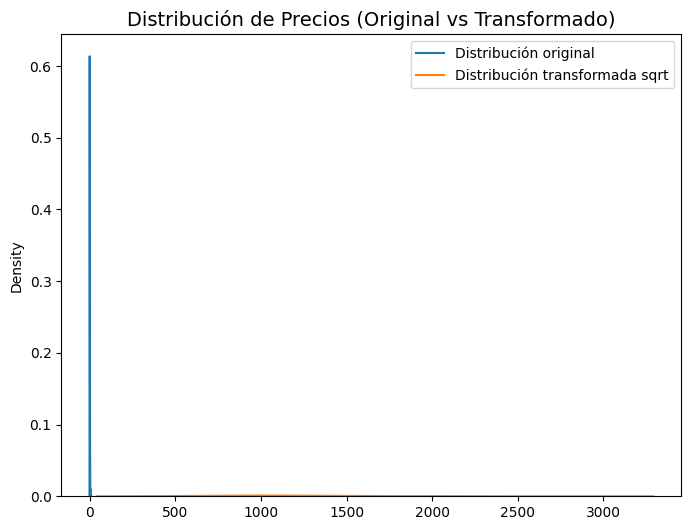

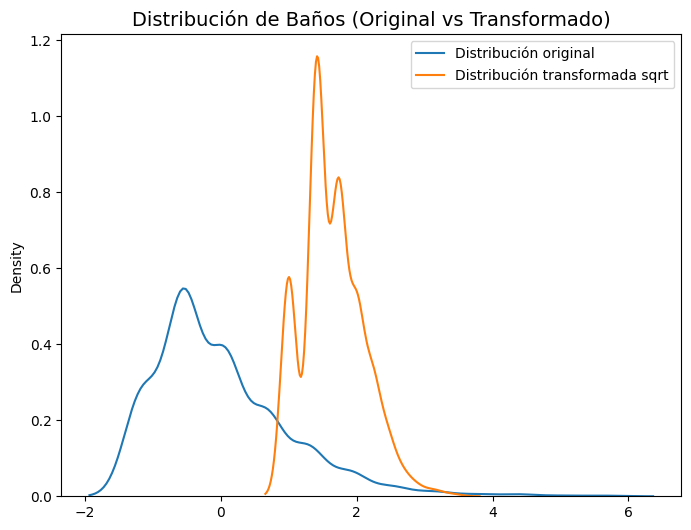

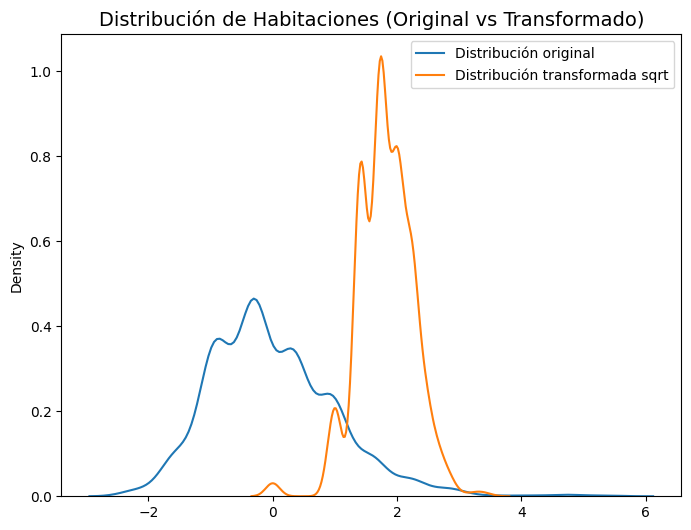

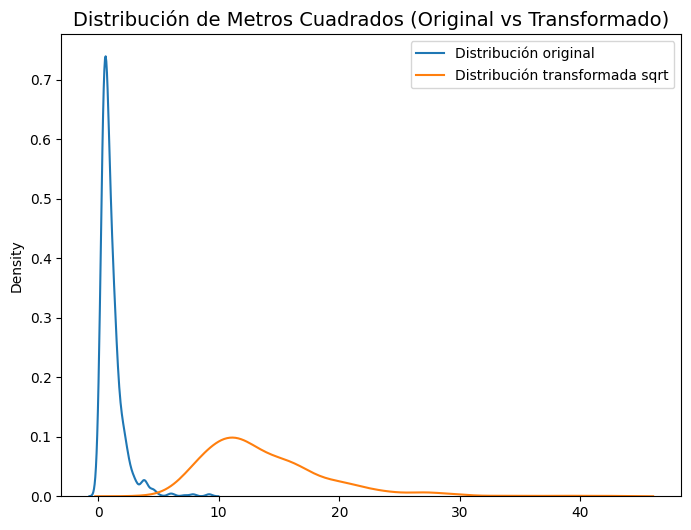

In [30]:
# 1. Distribución de Precios Transformados (Raíz Cuadrada)
plt.figure(figsize=(8, 6))
sns.kdeplot(precio_standard, label = "Distribución original")
sns.kdeplot(precio_sqrt, label = "Distribución transformada sqrt")
plt.title("Distribución de Precios (Original vs Transformado)", fontsize=14)
plt.legend();


# 2. Distribución de Baños Transformados (Raíz Cuadrada)
plt.figure(figsize=(8, 6))
sns.kdeplot(baños_standard, label = "Distribución original")
sns.kdeplot(baños_sqrt, label = "Distribución transformada sqrt")
plt.title("Distribución de Baños (Original vs Transformado)", fontsize=14)
plt.legend();


# 3. Distribución de Habitaciones Transformadas (Raíz Cuadrada)
plt.figure(figsize=(8, 6))
sns.kdeplot(habitaciones_standard, label = "Distribución original")
sns.kdeplot(habitaciones_sqrt, label = "Distribución transformada sqrt")
plt.title("Distribución de Habitaciones (Original vs Transformado)", fontsize=14)
plt.legend();

# 4. Distribución de Metros Cuadrados Transformados (Raíz Cuadrada)
plt.figure(figsize=(8, 6))
sns.kdeplot(metros_cuadrados_standard, label = "Distribución original")
sns.kdeplot(metros_cuadrados_sqrt, label = "Distribución transformada sqrt")
plt.title("Distribución de Metros Cuadrados (Original vs Transformado)", fontsize=14)
plt.legend();




### 3. Contraste de Hipótesis
- Comparar los precios de las casas en dos barrios diferentes (**barrio X** vs. **barrio Y**).

In [31]:

# Filtrar precios por barrio
precio_moncloa = precio[direccion == "Moncloa"]
precio_hortaleza = precio[direccion == "Hortaleza"]

print(f"Precio del barrio de Moncloa: {precio_moncloa[:5]}")
print(f"Precio del barrio de Hortaleza: {precio_hortaleza[:5]}")

Precio del barrio de Moncloa: [1200000. 1200000.  930000. 1370000. 1950000.]
Precio del barrio de Hortaleza: [1300000. 1850000. 5500000. 1900000. 1650000.]


In [32]:
# Nivel de significancia
alpha = 0.05

# Normalidad
_, p_norm_moncloa = stats.normaltest(precio_moncloa)
_, p_norm_hortaleza = stats.normaltest(precio_hortaleza)

print("Pruebas de normalidad:")
print(f"p_norm_moncloa: {p_norm_moncloa}, p_norm_hortaleza: {p_norm_hortaleza}")



Pruebas de normalidad:
p_norm_moncloa: 5.873226110775567e-05, p_norm_hortaleza: 8.680155201292008e-07


In [33]:
# Varianza
_, p_varianza = stats.levene(precio_moncloa, precio_hortaleza)

print("Prueba de homogeneidad de varianza:")
print(f"p_varianza: {p_varianza}")

Prueba de homogeneidad de varianza:
p_varianza: 0.40443816369931884


In [34]:
# Comprobar supuestos
suposiciones = p_norm_moncloa > alpha and p_norm_hortaleza > alpha and p_varianza > alpha
if suposiciones:
    print("Se cumplen los supuestos de normalidad y homogeneidad de varianza")
else:
    print("No se cumplen los supuestos de normalidad y homogeneidad de varianza")

No se cumplen los supuestos de normalidad y homogeneidad de varianza


In [35]:
# Contrastar hipótesis
if suposiciones:
    # Prueba paramétrica
    _, p = stats.ttest_ind(precio_moncloa, precio_hortaleza, alternative="less")
else:
    # Prueba no paramétrica
    _, p = stats.mannwhitneyu(precio_moncloa, precio_hortaleza, alternative="less")

print(f"Resultado del contraste: p = {p}")

Resultado del contraste: p = 0.5650875564231699


In [36]:
# Decisión
if p < alpha:
    print("H₁ VERDADERA: Las casas de Barrio de Moncloa son más baratas que las de Barrio de Hortaleza. Rechazamos H₀.")
else:
    print("H₀ VERDADERA: Las casas de Barrio Moncloa no son más baratas que las de Barrio Hortaleza. Rechazamos H₁.")

H₀ VERDADERA: Las casas de Barrio Moncloa no son más baratas que las de Barrio Hortaleza. Rechazamos H₁.


- Evaluar si las casas con >=3 baños son más caras que las casas con 1-2 baños.

In [37]:
# Filtrar precios por número de baños
precio_3_o_mas_baños = precio[baños >= 3]
precio_1_2_baños = precio[(baños == 1) | (baños == 2)]

print(precio_3_o_mas_baños)
print(precio_1_2_baños)

[1920000. 1995000. 1300000. 1650000. 1590750. 1590000. 5700000. 2190000.
 3950000.  995000. 1295000. 3900000. 1175000. 1075000. 1970000. 4950000.
 1800000.  990000. 1650000. 7900000. 2450000. 1850000. 1255000. 1850000.
 1200000. 1125000. 1200000. 2300000. 1237000. 1625000. 1950000.  950000.
  750000. 2100000. 5500000.  930000. 1300000. 1900000. 1100000. 1370000.
 3000000. 1950000. 1100000. 1050000. 2800000. 2600000. 2275000. 1175000.
 2300000. 1400000. 1250000. 2800000.  795000. 1650000.  800000.  875000.
 1395000. 3500000. 1435000. 2950000. 1538000. 2800000. 1450000. 3550000.
 2575000.  859000. 1095000.  910000. 1625000. 1650000. 1290000. 2500000.
 1190000. 1790000.  840000. 3200000. 3500000. 1750000. 3500000. 1300000.
 2300000. 2200000. 2190000. 1900000. 2395000. 1500000. 2390000. 2990000.
 2000000. 1500000. 1300000.  719000.  820000. 1550000. 1129000. 2770000.
 1250000. 1490000. 1095000. 1800000.  900000. 1850000.  789000. 2150000.
 1850000. 1490000. 1349000. 1750000. 1850000. 14500

In [38]:
# Normalidad
_, p_norm_3_baños = stats.normaltest(precio_3_o_mas_baños)
_, p_norm_1_2_baños = stats.normaltest(precio_1_2_baños)

print("\nPruebas de normalidad:")
print(f"p_norm_3_baños: {p_norm_3_baños}, p_norm_1_2_baños: {p_norm_1_2_baños}")


Pruebas de normalidad:
p_norm_3_baños: 5.1773092092534186e-51, p_norm_1_2_baños: 4.3964404846424146e-49


In [39]:
# Varianza
_, p_varianza = stats.levene(precio_3_o_mas_baños, precio_1_2_baños)

print("Prueba de homogeneidad de varianza:")
print(f"p_varianza: {p_varianza}")

Prueba de homogeneidad de varianza:
p_varianza: 6.638233749597685e-27


In [40]:
# Comprobar supuestos
suposiciones = p_norm_3_baños > alpha and p_norm_1_2_baños > alpha and p_varianza > alpha
if suposiciones:
    print("Se cumplen los supuestos de normalidad y homogeneidad de varianza")
else:
    print("No se cumplen los supuestos de normalidad y homogeneidad de varianza")

No se cumplen los supuestos de normalidad y homogeneidad de varianza


In [41]:

# Contrastar hipótesis
if suposiciones:
    # Prueba paramétrica
    _, p = stats.ttest_ind(precio_3_o_mas_baños, precio_1_2_baños, alternative="greater")
else:
    # Prueba no paramétrica
    _, p = stats.mannwhitneyu(precio_3_o_mas_baños, precio_1_2_baños, alternative="greater")

print(f"Resultado del contraste: p = {p}")

Resultado del contraste: p = 1.952124026653252e-108


In [42]:
# Decisión
if p < alpha:
    print("H₁ VERDADERA: Las casas con ≥ 3 baños son más caras que las casas con 1-2 baños. Rechazamos H₀.")
else:
    print("H₀ VERDADERA: Las casas con ≥ 3 baños no son más caras que las casas con 1-2 baños. Rechazamos H₁.")

H₁ VERDADERA: Las casas con ≥ 3 baños son más caras que las casas con 1-2 baños. Rechazamos H₀.
